# Assignment #3 - Reinforcement Learning

### <font color="red"> DUE: Mar 19 (Monday) 11:00 pm </font>  

<font color="Purple">Shama Zabeen Shaik</font>

# I. Overview

To make the students get familiar with the implementation of reinforcement learning and helping the students understand the different methods involved in the implementation of the RL algorithms. The aim of this assignment is to make us implement RL on maze and Blackjack game problems. I have made use of the Q-learning model to predict the action that could be taken for a given state based on the previous learning with the help of rewards.

In [34]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym
from gym import spaces
from gym.utils import seeding

# II. Problems 

## A. Maze Problem

### Explanation:

<br><font color="Purple">A maze is a path or collection of paths from entrance to goal. the pathways and walls in maze are fixed. In our environment, maze is a 2 dimentional matrix with values defining the path ('O' value), wall ('H' value) and goal('G' value). Using RL, we are asked to find out the path from the start state to the goal state. Goal state is a reachable point in th maze while the starting point could be any point inside the maze.</font>



### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [35]:
%%bash 
cat grid.txt

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO

### GridWorld

It is the implementation of maze environment in class. In the constructor, input file is taken where maze environment information is given. There are four actions to move an agent inside maze. The different rewards used are -5 if the agent moves out of grid or falls in a hole, -1 for each step cost and 30 points for reaching the goal state. 

#### Explanation of code for Grid World Class
#####  Functions used inside Maze Problem:
1. get_cur_state(): Used for fetching current state. (current point inside matrix)
2. get_size(): Used for fetching size of a matrix
3. read_map(): Used for creating maze environment from a given input file
4. print_map(): Prints the maze environment
5. check_state(): To check whether the given input state is valid inside maze or not.
6. next(): Fetches the next state information based on the action given in the input
7. init(): Initializes all states with zeroes
8. is_goal(): To check the the given input state is goal state or not
9. get_actions(): Function will return all possible actions for a given state 

### Class

In [36]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [37]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [38]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## B. Blackjack-V0


### Description:

Blackjack is a card game commonly known as **twenty-one**. It is played between multiple players and a dealer. Each player competes against the dealer but not against each other. The objective is to beat the dealer in one of the following ways:

1. Get 21 points on the player's first two cards (called a "blackjack" or "natural"), without a dealer blackjack.
2. Reach a final score higher than the dealer without exceeding 21.
3. Let the dealer draw additional cards until their hand exceeds 21.

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

<br/>Each player and dealer gets 2 cards. the cards of the players are all open while one of the cards of the dealer is open with one card closed. The value of cards two through ten is their pip value (2 through 10). Face cards (Jack, Queen, and King) are all worth ten. Aces can be worth one or eleven. Once all player have completed their hand, it would be the dealer's turn to take the card. The dealer wouldn't complete when all the players are busted(If the sums of values of cards count exceeds 21) or any player has Blackjack(not required in our environment). The dealer then reveals the hidden card and must hit until the cards total 17 or more points. A player will win if he is not busted or have value greater then dealers sum.



Let's now play BackJack Game!!

https://gym.openai.com/envs/Blackjack-v0/

### Blackjack-V0 (OpenAI Gym)

Blackjack is a card game where the goal is to obtain cards that sum to as near as possible to 21 without going over.  the players play against a fixed dealer. Face cards (Jack, Queen, King) have point value 10. Aces can either count as 11 or 1, and it's called 'usable' at 11. This game is played with an infinite deck (or with replacement). 

The game starts with each (player and dealer) having one face up and one face down card. The player can request additional cards (hit=1) until they decide to stop (stick=0) or exceed 21 (bust). After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater.  If the dealer goes bust the player wins. If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.  The reward for winning is +1, drawing is 0, and losing is -1. The observation of a 3-tuple of: the players current sum, the dealer's one showing card (1-10 where 1 is ace), and whether or not the player holds a usable ace (0 or 1). 

#### Explanation of code for Blackjack Class

#####  Functions used inside Blackjack Problem:

1. get_cur_state(): Returns the current state for the player
2. _init_(): Initiates the Blackjack environment with variables values. 
3. step(): Based on the given action for a player, a card is taken from a deck or dealer will take card until his sum reaches value greater then 17. Rewards are returned based on the results
4. _get_obs(): Returns 3-tuple value(the players current sum, the dealer's one showing card (1-10 where 1 is ace), and whether or not the player holds a usable ace (0 or 1))
5. reset(): Resets the player cards and the dealers
6. seed(): Seed for choosing random cards.

#####  External Functions used for Blackjack Problem:
<br><font color="Purple">
1. cmp(): For comparing the input a and b( To compare wether dealer or player value is greater)
2. draw_card(): Returns a random card
3. draw_hand(): Returns two random for reseting the value
4. usable_ace(): To check whether the ace can be used as 1 or 11
5. sum_hand(): Returns the sums of value of cards for the input state(Considering usable ace)
6. is_bust(): To check whether the sum is greater then 21 or not. If the value greater then 21 then the player is busted
7. score(): Returns the sum value if the player is not busted
8. is_natural(): Returns true if the first 2 value is equal to Ace and 10. The state should have only 2 value. </font

## Blackjack Class

In [39]:
def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv(gym.Env):
    
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
    
    def get_cur_state(self):
        return self.player
    
    def step(self, action):
        assert self.action_space.contains(action)
        if action:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1:
                reward = 1.5
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        if(usable_ace(self.player)):
            af = 1
        else:
            af = 0
        return (sum_hand(self.player), self.dealer[0], af)

    def reset(self):
        self.dealer = draw_hand(self.np_random)
        self.player = draw_hand(self.np_random)
        return self._get_obs()


In [40]:
bj = BlackjackEnv(True)

# III. Methods

## SARSA Method:
State–action–reward–state–action (Sarsa) is an algorithm for learning a Markov decision process policy, used in the reinforcement learning area of machine learning. A SARSA agent interacts with the environment and updates the policy based on actions taken, hence this is known as an on-policy learning algorithm.

 <font color='red' size=5>$ ( S, A, P, R, \gamma ) $ </font>
* $S$ : a finite set of states
* $A$ : a finite set of actions
* $P$ : a state transition probability
* $P^a_{ss^\prime} = P [ S_{t+1} = s^\prime | S_t = s, A_t = a ]$
* $R$ : a reward function
* $\gamma$ : a discount factor

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$


**[Algorithm: SARSA]**
![](http://incompleteideas.net/book/ebook/pseudotmp8.png)


## Q Learning:
Q-learning is a model-free reinforcement learning technique. It is able to compare the expected utility of the available actions (for a given state) without requiring a model of the environment. Q-learning can handle problems with stochastic transitions and rewards, without requiring adaptations.


$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

**[Algorithm: Q-learning]**

![](http://incompleteideas.net/book/ebook/pseudotmp9.png)


## Choice of TD learning and Reason

The model used for RL is Q-Learning. SARSA and Q Learning are both reinforcement learning algorithms that work in a similar way. The most striking difference is that **SARSA is on policy** while **Q Learning is Off-policy**. They mostly look the same except that in SARSA we take actual action and in Q Learning we take the action with highest reward. 

To explain it in a more clear way, n SARSA, the agent gets rewards for a action taken in state 1. In contrast, in Q-learning the agent starts in state 1, performs action 1 and gets a reward (reward 1), and then looks and sees what the maximum possible reward for an action is in state 2, and uses that to update the action value of performing action 1 in state 1. So Q learning chooses the optimal results for a given state. 

## RLAgent for Maze

1. epsilon_greed(): In this function, based on epsilon value, either the next action is taken randomly or in a greedy way. Greeday way is selection reward which has maximum reward.
2. train(): All parameter for trian are send as input and Q value is initiated. The Q-learning model is implemented as RL algorithm. Based on maxstep and maxiter, Q value is learned. 
3. _init_(): This is used for getting the environment and initiating the Maze probelem
4. test(): This method is finding the route for the maze from a given start point based on Q-Value obtained from train function.

In [41]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def epsilon_greed(self, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1]])
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 10000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                self.Q[s[0],s[1], a] += alpha * (r + gamma * np.max(self.Q[s1[0],s1[1], :]) - self.Q[s[0],s[1],a])
                
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of 
        env.init(start)
        s = env.get_cur_state()
        a = np.argmax(self.Q[s[0],s[1]])
        trace = np.array(coord_convert(s, self.size))
        for step in range(maxstep):
            env.next(a)
            s1 = env.get_cur_state()
            a1 = np.argmax(self.Q[s1[0],s1[1]])
            
            trace = np.vstack((trace, coord_convert(s1, self.size)))
            
            if env.is_goal(): 
                break

            s = s1
            a = a1

        
        return trace            

## RLAgent for Gym (Blackjack-V0)
1. _int_(): This function used for initiating the Blackjack environment.
2. epsilon_greed(): In this function, based on epsilon value, either the next action is taken randomly or in a greedy way. Greeday way is selection reward which has maximum reward.
3. train(): All parameter for trian are send as input and Q value is initiated. The Q-learning model is implemented as RL algorithm. Based on maxstep and maxiter, Q value is learned. All scenarios like natural was handled in train functon. 
4. test(): This method is used for winning the Blackjack game based on the Q value obtained from the train() function

In [42]:
class RLBlackjack: 
    
    def __init__(self, bj):
        self.env = bj
        self.dealer = bj.dealer
        self.player = bj.player
        #self.size = bj.get_size()
        self.n_a = 2
        # self.Q table including the surrounding border
        self.Q = np.zeros((32,11,2))
        self.count = 0
    
    def epsilon_greed(self, epsilon, s):
        if(s[0] > 20):
            return 0
        else:
            if np.random.rand() < epsilon:
                return np.random.randint(self.n_a)
            else:
                return np.argmax(self.Q[s[0], s[1]])
        
    def train(self, **params):
        # parameters
        self.count = 0
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        self.Q[...] = 0
        rtrace = []
        steps = []
        sums = []
        decisions = []
        for j in range(maxiter):
            bj.reset()
            s = bj._get_obs()
            a = self.epsilon_greed(epsilon, s)
            rewards = []
            step = 0
            # For Checking whether the player is natural winner or not [1,10]
            if is_natural(bj.player):
                r = 1.5
                rewards.append(r)
                self.Q[s[0], s[1], a] = 0
                sums.append(s[0])
                if(r > 0):
                    self.count = self.count + 1
                    decisions.append(1)
                else:
                    decisions.append(-1);
            else:
                for step in range(maxstep):
                    s1, r, done, d = bj.step(a)
                    a1 = self.epsilon_greed(epsilon, s1)
                    rewards.append(r)
                    self.Q[s[0], s[1], a] += alpha * (r + gamma * np.max(self.Q[s1[0], s1[1], :]) - self.Q[s[0], s[1], a])
                    if done:
                        self.Q[s1[0], s1[1], a1] = 0
                        sums.append(s1[0])
                        if(r > 0):
                            self.count = self.count + 1
                            decisions.append(1)
                        else:
                            decisions.append(-1);
                        break
                    s = s1
                    a = a1
            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, sums, decisions
    def test(self, maxiter=1000, maxstep=100):
        self.count = 0
        rtrace = []
        steps = []
        sums = []
        decisions = []
        # Running for Maxiteration.
        for j in range(maxiter):
            bj.reset()
            s = bj._get_obs()
            a = np.argmax(self.Q[s[0], s[1]])
            rewards = []
            step = 0
            if is_natural(bj.player):
                r = 1.5
                rewards.append(r)
                sums.append(s[0])
                if(r > 0):
                    self.count = self.count + 1
                    decisions.append(1)
                else:
                    decisions.append(-1);
            else:
                for step in range(maxstep):
                    s1, r, done, d = bj.step(a)
                    a1 = np.argmax(self.Q[s1[0], s1[1]])
                    rewards.append(r)
                    # Game is completed or not is done by checking this flag
                    if done:
                        sums.append(s1[0])
                        if(r > 0):
                            self.count = self.count + 1
                            decisions.append(1)
                        else:
                            decisions.append(-1);
                        break
                    s = s1
                    a = a1
            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, sums, decisions

# IV - Results

- Describe the choice of your parameters for $\gamma$, $\alpha$, and $\epsilon$. 
  - Run experiments to find good parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs (even from mine.)
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

### Utility functions for Plotting

- finish the TODOs here for plotting

### Code for plotting the Maze problem for train and test function

In [43]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    # TODO: plot rewards 
    plt.plot(rtrace)
    plt.ylabel("total rewards")

    ax1 = fig.add_subplot(222)
    # TODO: plot steps
    plt.plot(steps)
    plt.ylabel("number of steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("MAX Q agent")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "Last episode")

    plt.plot()

### Training and Testing with GridWorld

In [44]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   amma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

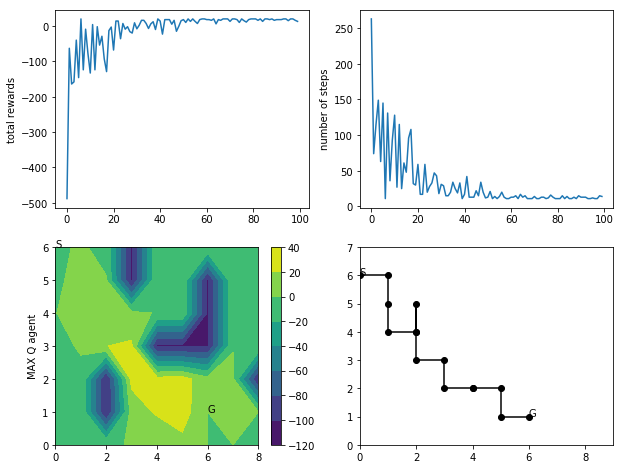

In [45]:
plot_train(agent, rtrace, steps, trace, start)

## Plot for various value of alpha, epsilon vs Sum of rewards

<function matplotlib.pyplot.show>

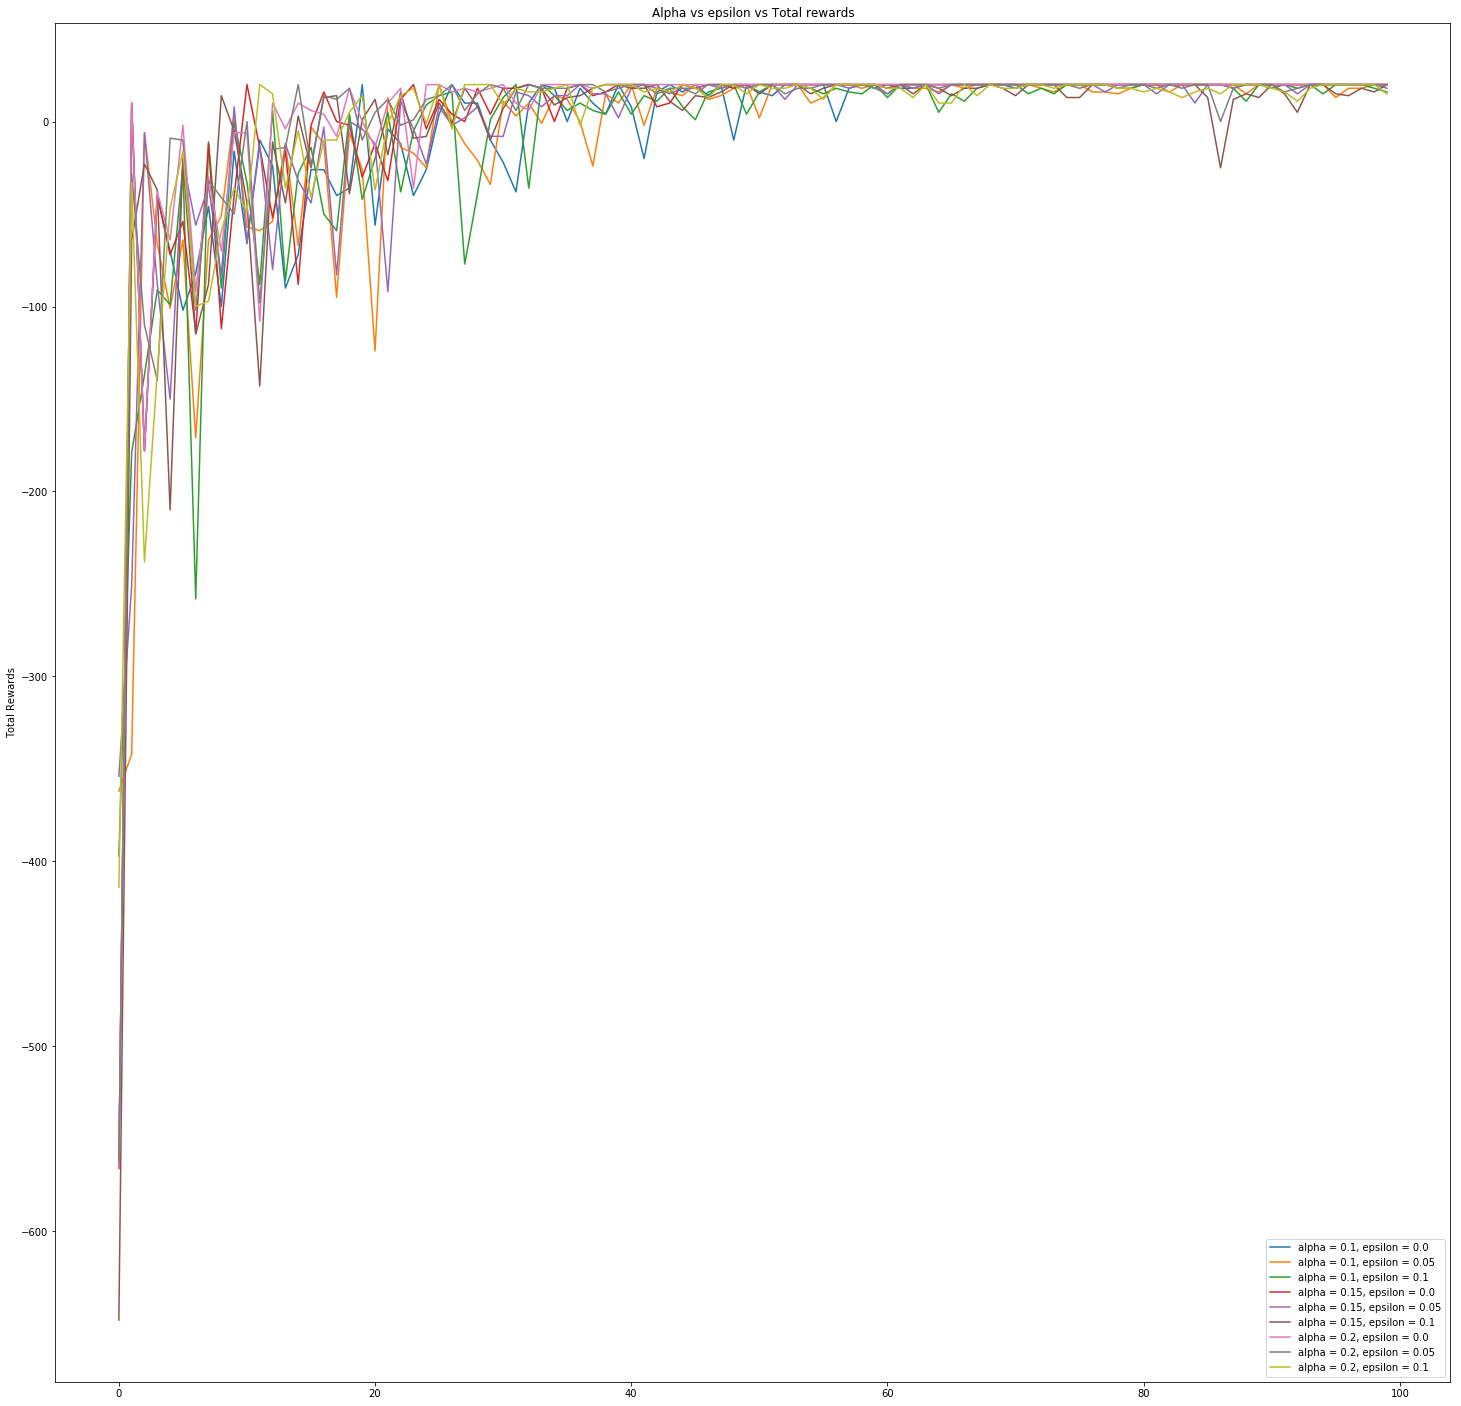

In [46]:
plt.figure(figsize=(25,25))
plt.ylabel("Total Rewards")
plt.title('Alpha vs epsilon vs Total rewards')
for j in range(10, 25, 5):
    for i in range(0, 15, 5):
        agent = RLAgent(env)
        start = [0,0]
        rtrace, steps, trace = agent.train(start, 
                                   amma=0.99, 
                                   alpha = 0.01 * j, 
                                   epsilon=0.01 * i, 
                                   maxiter=100, 
                                   maxstep=1000)
        string_alpha = "alpha = " + str(0.01 * j) + ", epsilon = " + str(0.01 * i)
        plt.plot(rtrace, label =string_alpha)
plt.legend()
plt.show

## Plot for various value of alpha, epsilon vs Steps

<function matplotlib.pyplot.show>

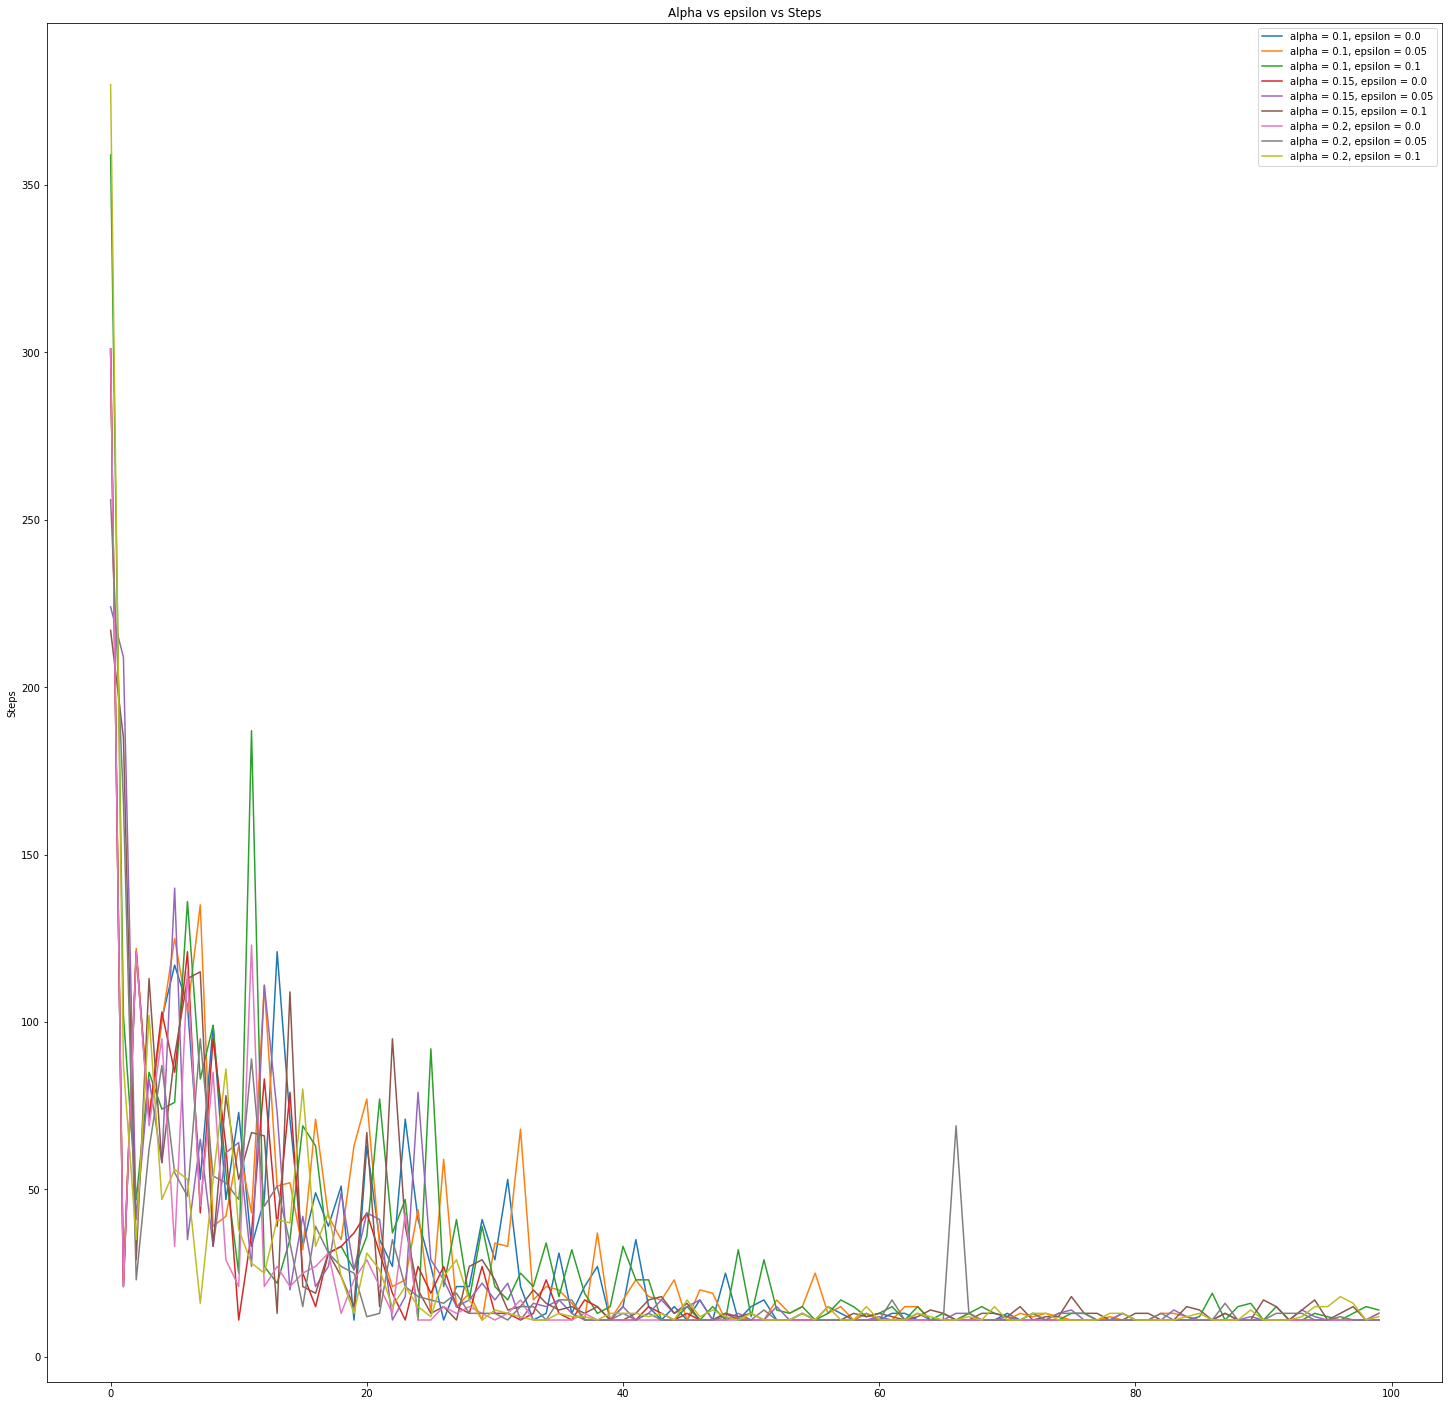

In [47]:
plt.figure(figsize=(25,25))
plt.ylabel("Steps")
plt.title('Alpha vs epsilon vs Steps')
for j in range(10, 25, 5):
    for i in range(0, 15, 5):
        agent = RLAgent(env)
        start = [0,0]
        rtrace, steps, trace = agent.train(start, 
                                   amma = 0.99, 
                                   alpha = 0.01 * j, 
                                   epsilon = 0.01 * i, 
                                   maxiter = 100, 
                                   maxstep = 1000)
        string_alpha = "alpha = " + str(0.01 * j) + ", epsilon = " + str(0.01 * i)
        plt.plot(steps, label =string_alpha)
plt.legend()
plt.show

# Results
## 1. Maze Problem

1. Gamma Value = 0.99
2. Alpha Value = 0.2
3. Epsilon Value = 0.4
4. Maxiter = 1000
5. MaxSteps = 1000

The Alpha and Epsilon is choosen based on the above graph for which mazes are sufficiently explored. If the mazes are explored enough then  the chances of reaching goal state is more. This is done by choosing above value correctly.


In [48]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   amma=0.99, 
                                   alpha=0.2, 
                                   epsilon=0.6, 
                                   maxiter=2000, 
                                   maxstep=1000)

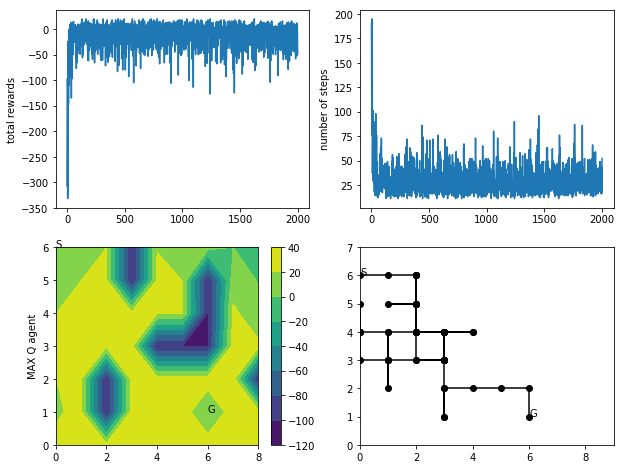

In [49]:
plot_train(agent, rtrace, steps, trace, start)

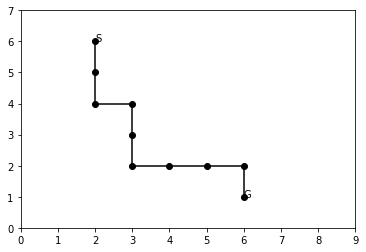

In [50]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

(7, 2)


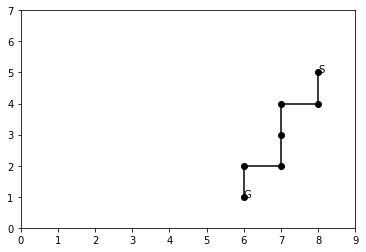

In [51]:
test_start = [1,8]
test_trace = agent.test(test_start)
print(test_trace.shape)
plot_trace(agent, test_start, test_trace)

### Training and testing with Blackjack

In [52]:
rlag = RLBlackjack(bj)

In [53]:
rtrace, steps, sums, decisions   = rlag.train(amma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=1000, 
                                   maxstep=80)

In [54]:
rlag.count

398

### Code for plotting graph for Blackjack problem

## Plot Sum of player * results 

In [55]:
### Plotting tools 

def plot_decisions(values, title="Test Trajectory"):
    plt.plot(values, "ko-")
    plt.xlim([0, 500])
    plt.ylim([-35, 35])
    plt.ylabel('sum of player * results(+1 for win and -1 for lose)')
    

In [56]:
values = []
for i in range (0, len(decisions)):
    values.append(decisions[i] * sums[i])

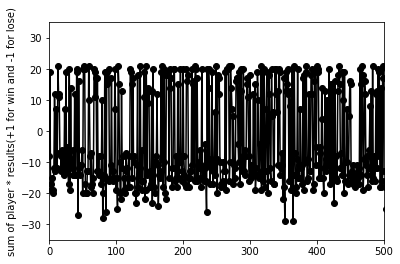

In [ ]:
plot_decisions(values)

# Plot for Alpha vs Maxiteration vs win%

1. Gamma = 0.99
2. Epsilon = 0.1

In [ ]:
plt.figure(figsize=(30,30))
plt.xlabel("Maxiteration in range 2000 to 10000")
plt.ylabel("Percentage of Win")
plt.title('Alpha vs Maxiteration vs Win%')
for j in range(10, 50, 5):
    win_count = []
    maxiters = []
    for i in range(2000, 10000, 500):
        rlag = RLBlackjack(bj)
        rtrace, steps, sums, decisions   = rlag.train(amma=0.99, 
                                           alpha = 0.01 * j, 
                                           epsilon=0.1, 
                                           maxiter=i, 
                                           maxstep=80)
        win_count.append((rlag.count * 100) / i)
        maxiters.append(i)
    string_alpha = "alpha = " + str(0.01 * j)
    plt.plot(maxiters, win_count, label =string_alpha)
plt.legend()
plt.show

# Plot for Epsilon vs Maxiteration vs win%
1. Gamma = 0.99
2. Alpha = 0.1

In [ ]:
plt.figure(figsize=(30,30))
plt.xlabel("Maxiteration in range 2000 to 10000")
plt.title('Epsilon vs Maxiteration vs Win%')
for j in range(0, 50, 5):
    win_count = []
    maxiters = []
    for i in range(2000, 10000, 500):
        rlag = RLBlackjack(bj)
        rtrace, steps, sums, decisions   = rlag.train(amma=0.99, 
                                           alpha = 0.1, 
                                           epsilon=0.01 * j, 
                                           maxiter=i, 
                                           maxstep=80)
        win_count.append((rlag.count * 100) / i)
        maxiters.append(i)
    string_epsilon = "epsilon = " + str(0.01 * j)
    plt.plot(maxiters, win_count, label = string_epsilon)
plt.legend()
plt.show

# Plot for Epsilon vs Maxiteration vs win%
1. Epsilon = 0.1
2. Alpha = 0.1

In [ ]:
plt.figure(figsize=(30,30))
plt.xlabel("Maxiteration in range 2000 to 10000")
plt.title('Gamma vs Maxiteration vs Win%')
for j in range(1, 10, 1):
    win_count = []
    maxiters = []
    for i in range(2000, 10000, 500):
        rlag = RLBlackjack(bj)
        rtrace, steps, sums, decisions   = rlag.train(amma=0.8 + 0.01 * j, 
                                           alpha = 0.1, 
                                           epsilon=0.1, 
                                           maxiter=i, 
                                           maxstep=80)
        win_count.append((rlag.count * 100) / i)
        maxiters.append(i)
    string_amma = "Gamma = " + str(0.8 + 0.01 * j)
    plt.plot(maxiters, win_count, label = string_amma)
plt.legend()
plt.show

In [ ]:
plt.figure(figsize=(30,30))
plt.xlabel("Maxiteration in range 2000 to 10000")
plt.title('Gamma vs Maxiteration vs Win%')
for j in range(1, 10, 1):
    win_count = []
    maxiters = []
    for i in range(2000, 10000, 500):
        rlag = RLBlackjack(bj)
        rtrace, steps, sums, decisions   = rlag.train(amma=0.9 + 0.01 * j, 
                                           alpha = 0.1, 
                                           epsilon=0.1, 
                                           maxiter=i, 
                                           maxstep=80)
        win_count.append((rlag.count * 100) / i)
        maxiters.append(i)
    string_amma = "Gamma = " + str(0.9 + 0.01 * j)
    plt.plot(maxiters, win_count, label = string_amma)
plt.legend()
plt.show

# Final Trian and Test
Based on various plots for different, alpha, gamma and Epsilon value, following model is trained and tested
1. Alpha = 0.15
2. Gamma = 0.86
3. Epsilon = 0.2
4. Maxiter = 100000
5. Maxstep = 80

These values are choosen based on the above graph. The choosen values give the maximum win percentage which is not achievable from other graphs. On a average a value greater than 41% is obtained.

In [ ]:
rlag = RLBlackjack(bj)
rtrace, steps, sums, decisions   = rlag.train(amma=0.86, 
                                   alpha=0.15, 
                                   epsilon=0.2, 
                                   maxiter=100000, 
                                   maxstep=80)

In [ ]:
rlag.count

# Plot for Win% Vs MaxIteration

In [ ]:
plt.figure(figsize=(25,25))
plt.xlabel("Maxiteration in range 2000 to 10000")
plt.ylabel("Percentage of Win")
maxiters = []
win_count = []
for i in range(2000, 10000, 500):
    rtrace, steps, sums, decisions   = rlag.test(maxiter=i, maxstep=80)
    win_count.append((rlag.count * 100) / i)
    maxiters.append(i)
plt.plot(maxiters, win_count)
plt.legend()
plt.show

In [ ]:
np.save('grid2.npy',agent.Q)

# V. Conclusions
<font color="Purple">
<br>This assignment was very interesting and was of a great help to learn implementation of the RL algorithms for games. having done this assignment, I have learnt various mothods in RL models and their uses.


There were a few problems that were faced in the process of finding optimal values for alpha, gamma and epsilon that increase the maximum win percentage or maximum chances for reaching the goal state. I have learnt plotting various line charts from this experiment.
</font>


# Extra Credit

- Let us have Blackjack-V0 Tournament in class (Mar 22nd.)!
- Top 4 students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Maze Problem | 
 | 5| Includes description of maze problem
 | 5| Explains the GridWorld
10 | Blackjack
 | 5| Includes description of maze problem
 | 5| Explains the Backjack-V0 (OpenAI Gym)
25 | Methods | 
 | 5| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 |10| Implementation of the selected approach
 | 5| explanation of the codes
45 | Results 
| 5| Reports the selected parameters for both problems. 
|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|10| Output plots (5 for each)
|10| reading and analysis of learning results and plots (5 for each)
5 | Conclusions 


## Reference
https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
<br/>https://en.wikipedia.org/wiki/Blackjack
<br/>https://en.wikipedia.org/wiki/State%E2%80%93action%E2%80%93reward%E2%80%93state%E2%80%93action
<br/>https://en.wikipedia.org/wiki/Q-learning
<br/>https://studywolf.wordpress.com/2013/07/01/reinforcement-learning-sarsa-vs-q-learning/
<br/>https://github.com/vikasjiitk/Maze-Reinforcement-Learning/blob/master/main.py
<br/>http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-ReinforcementLearning.sol.ipynb